In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from src.DeepRock.utils import get_data
from sklearn import metrics
from src.DeepRock.utils import plot_confusion_matrix
import glob

#### randomly sample from three blocks

In [13]:
trn_num = 10000 # 100000
tst_num = 1000 # 10000

In [3]:
# select train and test pixels
trn_Xids = sorted(glob.glob('./data/block1/train/X/*.npy') + glob.glob('./data/block2/train/X/*.npy') + glob.glob('./data/block3/train/X/*.npy'))
trn_Yids = sorted(glob.glob('./data/block1/train/Y/*.npy') + glob.glob('./data/block2/train/Y/*.npy') + glob.glob('./data/block3/train/Y/*.npy'))
tst_Xids = sorted(glob.glob('./data/block1/test/X/*.npy') + glob.glob('./data/block2/test/X/*.npy') + glob.glob('./data/block3/test/X/*.npy'))
tst_Yids = sorted(glob.glob('./data/block1/test/Y/*.npy') + glob.glob('./data/block2/test/Y/*.npy') + glob.glob('./data/block3/test/Y/*.npy'))

In [14]:
trn_X, trn_Y = get_data(trn_Xids, trn_Yids, trn_num)
tst_X, tst_Y = get_data(tst_Xids, tst_Yids, tst_num)

In [5]:
cls_names = ['Vegetation', 'Unkown Rocks', 'Carbonate_sediment',
           'Dolerite', 'Feldspathic_sediment', 'Felsic_volcanic', 'Gneiss', 'Granite', 'Mafic_volcanic', 'Quartz_sediment']

#### random forest classifier

In [5]:
clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0)

In [36]:
clf.fit(trn_X[:, :], trn_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [37]:
preds = clf.predict(tst_X[:, :])

In [38]:
clf.score(tst_X[:, :], tst_Y)

0.53639999999999999

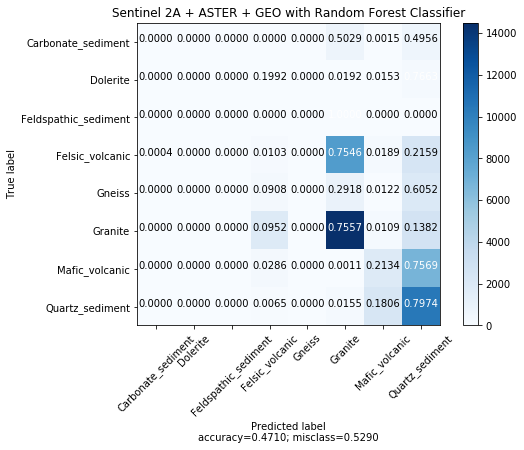

In [39]:
cm = metrics.confusion_matrix(tst_Y, preds, labels=np.asarray(np.unique(tst_Y), dtype=np.int)[1:])
plot_confusion_matrix(cm, target_names=[cls_names[i] for i in np.asarray(np.unique(tst_Y), dtype=np.int)[1:]], 
                      normalize=True, title='Sentinel 2A + ASTER + GEO with Random Forest Classifier')

#### SVM

In [6]:
clf = SVC(kernel='rbf')

In [15]:
clf.fit(trn_X[:, :], trn_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
preds = clf.predict(tst_X[:, :])

In [17]:
clf.score(tst_X[:, :], tst_Y)

0.44500000000000001

In [20]:
np.unique(tst_Y)

array([ 0.,  2.,  3.,  5.,  6.,  7.,  8.,  9.])

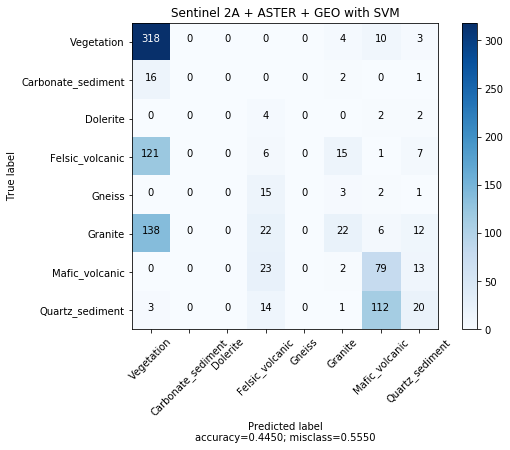

In [22]:
cm = metrics.confusion_matrix(tst_Y, preds, labels=np.asarray(np.unique(tst_Y), dtype=np.int)[:])
plot_confusion_matrix(cm, target_names=[cls_names[i] for i in np.asarray(np.unique(tst_Y), dtype=np.int)[:]], 
                      normalize=False, title='Sentinel 2A + ASTER + GEO with SVM')